In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from datetime import datetime
from dateutil.parser import parse
import csv

In [68]:
virus_reps = pd.read_csv("data/coronavirus/full_data_2020-03-18a.csv")
virus_reps['date'] = virus_reps['date'].astype('datetime64[ns]')
#virus_reps.set_index('date')
total_reps = virus_reps[['date', 'location', 'total_cases']]
total_reps.columns = ['Date', 'Location', 'Cases']
#total_reps.plot.line()
total_reps.head()
type(total_reps)

pandas.core.frame.DataFrame

In [103]:
total_reps_us = total_reps.query("Location == 'United States'")
total_reps_us.columns = ['Date', 'Location', 'US Cases']
del total_reps_us['Location']
#total_reps_us.set_index('Date')
#total_reps_us.plot(kind='line')
#print(total_reps_us)

total_reps_china = total_reps.query("Location == 'China'")
total_reps_china.columns = ['Date', 'Location', 'China Cases']
del total_reps_china['Location']
#total_reps_china.set_index('Date')
#print(total_reps_china)
#total_reps_china.plot(kind='line')

total_reps_sk = total_reps.query("Location == 'South Korea'")
total_reps_sk.columns = ['Date', 'Location', 'South Korea Cases']
del total_reps_sk['Location']
#total_reps_sk.set_index('Date')
#print(total_reps_sk)
#total_reps_sk.plot(kind='line')

total_reps_italy = total_reps.query("Location == 'Italy'")
total_reps_italy.columns = ['Date', 'Location', 'Italy Cases']
del total_reps_italy['Location']
#total_reps_italy.set_index('Date')
#print(total_reps_italy)
#total_reps_italy.plot(kind='line')


#total_reps_us.dtypes
total_reps_china.head()

,Date,China Cases
498,2020-01-21,278
499,2020-01-22,310
500,2020-01-23,574
501,2020-01-24,835
502,2020-01-25,1297


In [109]:
#merge individual country dataframes
#us cases are good, china are NaN
#merge = total_reps_us.append(total_reps_china, ignore_index=True, sort=False)
#China cases are ok, US fields all NaN
#merge = pd.concat([total_reps_us, total_reps_china], axis=1, sort=False)
#us cases are good, china are NaN
#merge = pd.concat([total_reps_us, total_reps_china], ignore_index=False, sort=False)
#merge=pd.merge(total_reps_us, total_reps_china, how='inner', left_index=True, right_index=True)
#China cases are ok, US fields all NaN
#merge = pd.concat([total_reps_us, total_reps_china], axis=1)
us_china = pd.merge(total_reps_us, total_reps_china, how='inner', on='Date', sort=True)
us_china_sk = pd.merge(us_china, total_reps_sk, how='inner', on='Date', sort=True)
us_china_sk_italy = pd.merge(us_china_sk, total_reps_italy, how='inner', on='Date', sort=True)

In [110]:
us_china_sk_italy.head(50)

,Date,US Cases,China Cases,South Korea Cases,Italy Cases
0,2020-01-31,6,9720,11,2
1,2020-02-01,7,11821,12,2
2,2020-02-02,8,14411,15,2
3,2020-02-03,11,17238,15,2
4,2020-02-04,11,20471,16,2
5,2020-02-05,11,24363,18,2
6,2020-02-06,12,28060,23,2
7,2020-02-07,12,31211,24,3
8,2020-02-08,12,34598,24,3
9,2020-02-09,12,37251,27,3


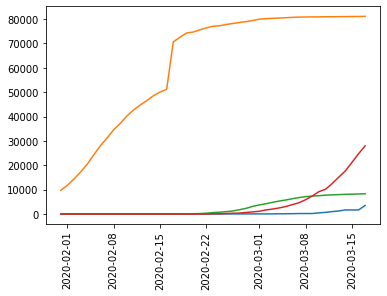

In [113]:
plt.plot(us_china_sk_italy['Date'], us_china_sk_italy['US Cases'])
plt.plot(us_china_sk_italy['Date'], us_china_sk_italy['China Cases'])
plt.plot(us_china_sk_italy['Date'], us_china_sk_italy['South Korea Cases'])
plt.plot(us_china_sk_italy['Date'], us_china_sk_italy['Italy Cases'])
plt.xticks(rotation='vertical')
plt.show()